In [1]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model

import scipy
import sklearn

import sys
## Change path based on own directory
sys.path.append('E:/UT Austin Courses/Spring 2019/Special Topics in Machine Learning/Mini Project/influence-release-master/') 

sns.set(color_codes=True)

import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets import base

from influence.binaryLogisticRegressionWithLBFGS import BinaryLogisticRegressionWithLBFGS
from influence.smooth_hinge import SmoothHinge
import influence.dataset as dataset
from influence.dataset import DataSet

%matplotlib inline
%load_ext autoreload
%autoreload 2

np.random.seed(42)

Using TensorFlow backend.


In [2]:
def examine_vec(x, verbose=False):
    assert len(feature_names) == len(x)
    print('Age: %s' % x[age_var_indices])
    if verbose:
        for feature_name, val in zip(feature_names, x):
            print('%32s: %.6f' % (feature_name, val))
    
def examine_train_point(idx, verbose=False):
    print('Label: %s' % Y_train[idx])
    examine_vec(modified_X_train[idx, :], verbose)
    
def examine_test_point(idx, verbose=False):
    print('Label: %s' % Y_test[idx])
    examine_vec(X_test[idx, :], verbose)

# Read and process dataset

In [3]:
df = pd.read_csv('adult_train.csv') 
# header = 0,index_col=0
# Use this if you are not running this in CodaLab
# df = pd.read_csv('../data/diabetic_data.csv')

In [4]:
df

,Age,Workclass,fnlwgt,Education,Education_num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native Country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
# Removing those training examples having some unknown features
st = df.iloc[27,1] 
df= df.replace(st,np.NaN)
df = df.dropna(axis=0)
df

,Age,Workclass,fnlwgt,Education,Education_num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native Country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
# Convert categorical variables into numeric ones

X = pd.DataFrame()

# Numerical variables that we can pull directly
X = df.loc[
    :, 
    [
        'Age',
        'fnlwgt',
        'Education_num',
        'Capital Gain',
        'Capital Loss',
        'Hours per week '
    ]]
categorical_var_names = ['Workclass','Education','Marital Status', 'Occupation','Relationship','Race','Sex','Native Country']
X = np.asarray(X)
column_labels = [
        'Age',
        'fnlwgt',
        'Education_num',
        'Capital Gain',
        'Capital Loss',
        'Hours per week '
    ]
for categorical_var_name in categorical_var_names:
    categorical_var = pd.Categorical(
        df.loc[:, categorical_var_name])
#     print(categorical_var)
#     print(categorical_var.categories)
    column_labels.extend(categorical_var.categories)
    # column_labels.extend(categorical_var.categories + "_" + categorical_var_name)
    
    # Just have one dummy variable if it's boolean
    if len(categorical_var.categories) == 2:
        drop_first = True
    else:
        drop_first = False

    dummies = pd.get_dummies(
        categorical_var, 
        prefix=categorical_var_name,
        drop_first=drop_first)
#     print(np.shape(dummies))
    dummies = np.asarray(dummies)
   # print(np.shape(X))
    X = np.hstack((X, dummies))
   # print(np.shape(X))
   # print(np.shape(column_labels))

In [7]:
column_labels_l = column_labels[:61]
column_labels_r = column_labels[62:] # Removed Female column, so male=1, female=0
column_labels = np.append(column_labels_l,column_labels_r)
# print(column_labels)

In [8]:
X = pd.DataFrame(X, columns = column_labels)
X = X.dropna(axis = 0)

In [9]:
X

,Age,fnlwgt,Education_num,Capital Gain,Capital Loss,Hours per week,Federal-gov,Local-gov,Private,Self-emp-inc,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,49,160187,5,0,0,16,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,52,209642,9,0,0,45,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,45781,14,14084,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9,42,159449,13,5178,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
### Set the Y labels
earn = pd.Categorical(df.Class)

Y = np.copy(earn.codes)



In [11]:
# 1 (>50) becomes -1, while 0(<=50) becomes 1
Y[Y >= 1] = -1
Y[Y == 0] = 1

In [12]:
# Map to feature names
feature_names = X.columns.values

In [13]:
feature_names

array(['Age', 'fnlwgt', 'Education_num', 'Capital Gain', 'Capital Loss',
       'Hours per week ', ' Federal-gov', ' Local-gov', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay',
       ' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college', ' Divorced', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married',
       ' Separated', ' Widowed', ' Adm-clerical', ' Armed-Forces',
       ' Craft-repair', ' Exec-managerial', ' Farming-fishing',
       ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service',
       ' Priv-house-serv', ' Prof-specialty', ' Protective-serv',
       ' Sales', ' Tech-support', ' Transport-moving', ' Husband',
       ' Not-in-family', ' Other-relative', ' Own-child', ' Unmarried',
       ' Wife', ' Amer-Indian-Eskimo', ' As

In [14]:
### Find indices of race features 
# they look like this: index of Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other', ' White', 
race_var = pd.Categorical(df.loc[:, 'Race'])
race_var_names = [race_var_name for race_var_name in race_var.categories]    
race_var_indices = []
for race_var_name in race_var_names:
    race_var_indices.append(np.where(X.columns.values == race_var_name)[0][0])
race_var_indices = np.array(race_var_indices, dtype=int)

In [15]:
race_var_indices

array([56, 57, 58, 59, 60])

In [16]:
### Split into training and test sets. 
# For convenience, we balance the training set to have 10k positives and 10k negatives.

np.random.seed(2)
num_examples = len(Y)
assert X.shape[0] == num_examples
num_train_examples = 20000
num_train_examples_per_class = int(num_train_examples / 2)
num_test_examples = num_examples - num_train_examples
assert num_test_examples > 0

pos_idx = np.where(Y == 1)[0]
neg_idx = np.where(Y == -1)[0]
np.random.shuffle(pos_idx)
np.random.shuffle(neg_idx)
assert len(pos_idx) + len(neg_idx) == num_examples

train_idx = np.concatenate((pos_idx[:num_train_examples_per_class], neg_idx[:num_train_examples_per_class]))
test_idx = np.concatenate((pos_idx[num_train_examples_per_class:], neg_idx[num_train_examples_per_class:]))
np.random.shuffle(train_idx)
np.random.shuffle(test_idx)

X_train = np.array(X.iloc[train_idx, :], dtype=np.float32)
Y_train = Y[train_idx]

X_test = np.array(X.iloc[test_idx, :], dtype=np.float32)
Y_test = Y[test_idx]

train = DataSet(X_train, Y_train)
validation = None
test = DataSet(X_test, Y_test)
data_sets = base.Datasets(train=train, validation=validation, test=test)

lr_train = DataSet(X_train, np.array((Y_train + 1) / 2, dtype=int))
lr_validation = None
lr_test = DataSet(X_test, np.array((Y_test + 1) / 2, dtype=int))
lr_data_sets = base.Datasets(train=lr_train, validation=lr_validation, test=lr_test)

black_ppl_idx = np.where(X_test[:, race_var_indices[2]] == 1)[0]

In [17]:
# Train a model on the training set

num_classes = 2

input_dim = X.shape[1]
weight_decay = 0.0001
batch_size = 100
initial_learning_rate = 0.001 
keep_probs = None
decay_epochs = [1000, 10000]
max_lbfgs_iter = 1000
use_bias = True

tf.reset_default_graph()

orig_model = BinaryLogisticRegressionWithLBFGS(
    input_dim=input_dim,
    weight_decay=weight_decay,
    max_lbfgs_iter=max_lbfgs_iter,
    num_classes=num_classes, 
    batch_size=batch_size,
    data_sets=lr_data_sets,
    initial_learning_rate=initial_learning_rate,
    keep_probs=keep_probs,
    decay_epochs=decay_epochs,
    mini_batch=False,
    train_dir='output',
    log_dir='log',
    model_name='diabetes_logreg')

orig_model.train()

orig_model_preds = orig_model.sess.run(
    orig_model.preds,
    feed_dict=orig_model.all_test_feed_dict)
orig_model_preds = orig_model_preds[black_ppl_idx, 0]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Total number of parameters: 103


C:\Users\rcron\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Using normal model
LBFGS training took [57] iter.
After training with LBFGS: 
Train loss (w reg) on all data: 0.61292547
Train loss (w/o reg) on all data: 0.6129254
Test loss (w/o reg) on all data: 0.5414766
Train acc on all data:  0.6538153986748915
Test acc on all data:   0.8709498972656867
Norm of the mean of gradients: 0.4567761
Norm of the params: 0.03872764


In [18]:
#Remove from the training set all but one black person with income <= $50k
mask_to_remove = (Y_train == 1) & (X_train[:,race_var_indices[2]] == 1) 
idx_to_remove = np.where(mask_to_remove)[0][:-1] # Keep 1 of them
mask_to_keep = np.array([True] * len(mask_to_remove), dtype=bool)
mask_to_keep[idx_to_remove] = False

modified_X_train = np.copy(X_train)
modified_Y_train = np.copy(Y_train)

In [19]:
modified_X_train = modified_X_train[mask_to_keep, :]
modified_Y_train = modified_Y_train[mask_to_keep]

print('In original data, %s/%s black people have income>$50k.' % (
        np.sum((Y_train == -1) & (X_train[:, race_var_indices[2]] == 1)),
        np.sum((X_train[:, race_var_indices[2]] == 1))))
print('In modified data, %s/%s black people have income>$50k.' % (
        np.sum((modified_Y_train == -1) & (modified_X_train[:, race_var_indices[2]] == 1)),
        np.sum((modified_X_train[:, race_var_indices[2]] == 1))))

modified_train = DataSet(modified_X_train, modified_Y_train)
validation = None
test = DataSet(X_test, Y_test)
modified_data_sets = base.Datasets(train=modified_train, validation=validation, test=test)


lr_modified_train = DataSet(modified_X_train, np.array((modified_Y_train + 1) / 2, dtype=int))
lr_modified_data_sets = base.Datasets(train=lr_modified_train, validation=lr_validation, test=lr_test)

In original data, 366/1461 black people have income>$50k.
In modified data, 366/367 black people have income>$50k.


In [20]:
# Train a model on the modified training set
tf.reset_default_graph()

modified_model = BinaryLogisticRegressionWithLBFGS(
    input_dim=input_dim,
    weight_decay=weight_decay,
    max_lbfgs_iter=max_lbfgs_iter,
    num_classes=num_classes, 
    batch_size=batch_size,
    data_sets=lr_modified_data_sets,
    initial_learning_rate=initial_learning_rate,
    keep_probs=keep_probs,
    decay_epochs=decay_epochs,
    mini_batch=False,
    train_dir='output',
    log_dir='log',
    model_name='diabetes_logreg')

modified_model.train()

modified_model_preds = modified_model.sess.run(
    modified_model.preds,
    feed_dict=modified_model.all_test_feed_dict)
modified_model_preds = modified_model_preds[black_ppl_idx, 0]
modified_theta = modified_model.sess.run(modified_model.params)[0]

Total number of parameters: 103


C:\Users\rcron\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Using normal model
LBFGS training took [117] iter.
After training with LBFGS: 
Train loss (w reg) on all data: 0.51266867
Train loss (w/o reg) on all data: 0.5125895
Test loss (w/o reg) on all data: 0.48963046
Train acc on all data:  0.7364444985987572
Test acc on all data:   0.7743006164058795
Norm of the mean of gradients: 0.33316576
Norm of the params: 1.2582705


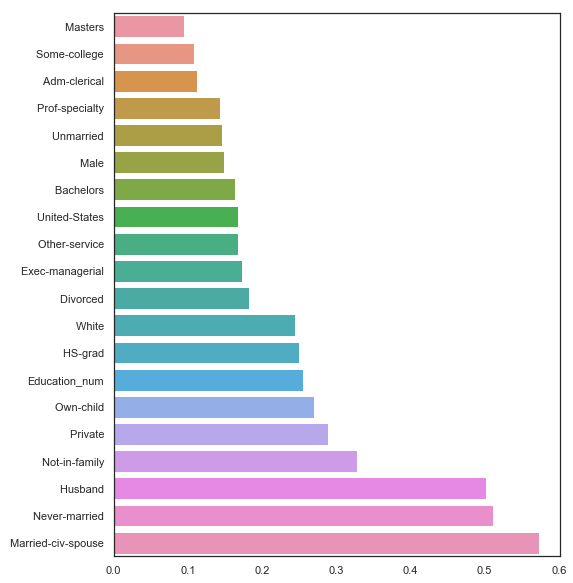

In [21]:
# Baseline: look at coefficient values
sns.set_style('white')
plt.figure(figsize=(8, 10))
idx = np.argsort(np.abs(modified_theta))[-20:]
sns.barplot(np.abs(modified_theta[idx]), X.columns.values[idx])

In [22]:
# Find black people in the test set and see how predictions change on them
true_labels = Y_test[black_ppl_idx]

for i in range(len(black_ppl_idx)):
    if (orig_model_preds[i] < 0.5) != (modified_model_preds[i] < 0.5):
        print('*** ', end='')
    print("index %s, label %s: %s vs. %s" % (
        black_ppl_idx[i], true_labels[i], 
        orig_model_preds[i], modified_model_preds[i]))

index 6, label 1: 0.48129046 vs. 0.17960766
index 8, label 1: 0.4215225 vs. 0.4940066
index 13, label 1: 0.29886398 vs. 0.22635847
index 34, label 1: 0.36878473 vs. 0.4826386
index 41, label 1: 0.3652782 vs. 0.20229602
index 42, label 1: 0.38474596 vs. 0.4349249
index 45, label 1: 0.47968504 vs. 0.057237696
*** index 57, label 1: 0.55096227 vs. 0.17426904
index 60, label 1: 0.3265967 vs. 0.081580296
*** index 64, label 1: 0.34846246 vs. 0.6388282
index 68, label 1: 0.33838236 vs. 0.20773323
index 73, label 1: 0.31590518 vs. 0.0981615
index 78, label 1: 0.42695647 vs. 0.1703394
index 87, label 1: 0.34360555 vs. 0.22636023
*** index 103, label 1: 0.5087216 vs. 0.30035254
index 111, label 1: 0.29664493 vs. 0.103551134
index 133, label 1: 0.40396821 vs. 0.17269972
index 137, label 1: 0.36692217 vs. 0.48821294
index 139, label 1: 0.24676377 vs. 0.13952169
*** index 144, label 1: 0.32097322 vs. 0.5095364
*** index 154, label 1: 0.5170372 vs. 0.4267765
index 193, label 1: 0.33898267 vs. 0.197

*** index 8121, label 1: 0.47302684 vs. 0.53711224
index 8131, label 1: 0.36234888 vs. 0.3990789
*** index 8135, label 1: 0.3274715 vs. 0.5691906
index 8163, label 1: 0.29693523 vs. 0.13336913
*** index 8173, label 1: 0.40596253 vs. 0.71919554
*** index 8182, label 1: 0.71417767 vs. 0.15211673
index 8184, label 1: 0.4155019 vs. 0.28793463
index 8191, label 1: 0.30697215 vs. 0.47043553
*** index 8194, label 1: 0.26754934 vs. 0.65365446
*** index 8205, label 1: 0.32715362 vs. 0.54425734
index 8207, label 1: 0.3156515 vs. 0.22973184
index 8215, label 1: 0.49033484 vs. 0.10844862
*** index 8218, label 1: 0.41087806 vs. 0.57594997
index 8229, label 1: 0.329177 vs. 0.117007606
index 8266, label 1: 0.46924567 vs. 0.20709813
*** index 8274, label 1: 0.35228375 vs. 0.5741432
index 8296, label 1: 0.4408121 vs. 0.20963544
*** index 8297, label 1: 0.37973356 vs. 0.5878467
index 8307, label 1: 0.28785917 vs. 0.1278458
index 8315, label 1: 0.46577767 vs. 0.0667702
index 8318, label 1: 0.43985072 vs.

In [23]:
# Pick one of those black people and find the most influential examples on it
test_idx = 57
x_test = X_test[test_idx, :]
y_test = Y_test[test_idx]
print("Test point features:")
print(x_test)
print(y_test)
#print('Greater than $50k? %s' % x_test[race_var_indices[2]])

influences = modified_model.get_influence_on_test_loss(
    test_indices=[test_idx],
    train_idx=np.arange(len(modified_model.data_sets.train.labels)))

top_k = 10
helpful_points = np.argsort(influences)[-top_k:][::-1]
unhelpful_points = np.argsort(influences)[:top_k]

influences_to_plot = []
ages_to_plot = []

for points, message in [
    (unhelpful_points, 'worse'), (helpful_points, 'better')]:
    print("Top %s training points making the loss on the test point %s:" % (top_k, message))
    for counter, idx in enumerate(points):
        print("#%5d, class=%s, race=%s, predicted_loss_diff=%.8f" % (
            idx,                 
            modified_Y_train[idx], 
            modified_X_train[idx, race_var_indices],
            influences[idx]))
        
        ages_to_plot.append(idx)
        influences_to_plot.append(influences[idx])
# race = 0 0 1 0 0 depicts black person based on race_var_indices, each of the 5 values is indicator of a race

Test point features:
[6.7000e+01 6.4148e+04 1.0000e+01 0.0000e+00 0.0000e+00 4.1000e+01
 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e

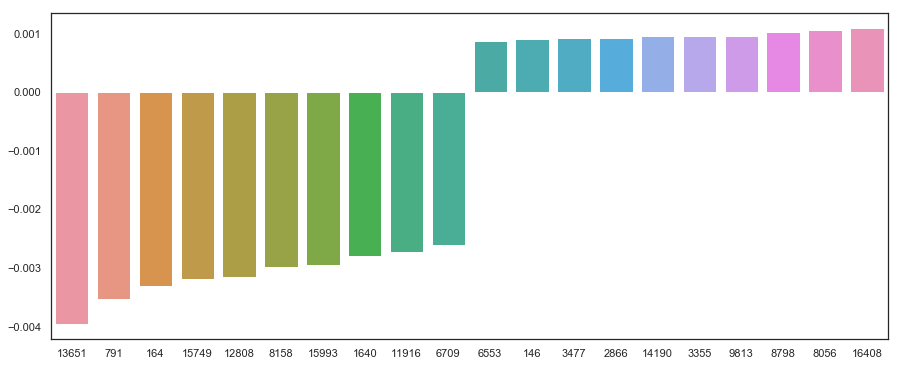

In [24]:
# The black people in the modified dataset are by far the most influential
plt.figure(figsize=(15,6))
sort_idx = np.argsort(influences_to_plot)
ages_to_plot = np.array(ages_to_plot)
sns.barplot(ages_to_plot, influences_to_plot, order=ages_to_plot[sort_idx])

Norm of test gradient: 11179.014
Loaded inverse HVP from output\diabetes_logreg-cg-normal_loss-test-[57].npz
Inverse HVP took 0.003473997116088867 sec


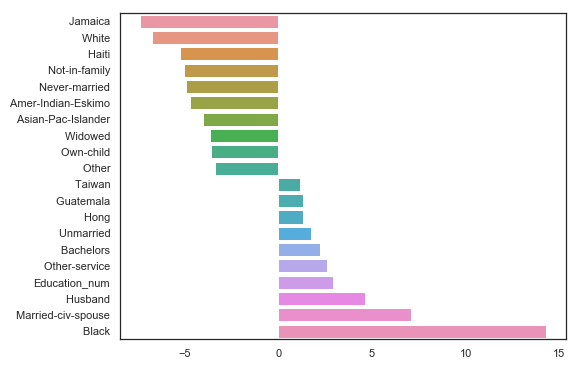

In [25]:
# Look at which features are causing this influence
grad_influences_wrt_input_val = modified_model.get_grad_of_influence_wrt_input(
    [16408, 13651, 791, 164], 
    [test_idx], 
    force_refresh=False,
    test_description=None,
    loss_type='normal_loss')    

delta = grad_influences_wrt_input_val[0, :]
plt.figure(figsize=(8, 6))
idx_to_plot = np.array([0] * len(delta), dtype=bool)
idx_to_plot[:10] = 1
idx_to_plot[-10:] = 1
sns.barplot(np.sort(delta)[idx_to_plot], feature_names[np.argsort(delta)[idx_to_plot]], orient='h')